In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter , CoxPHFitter
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

In [2]:
pip install lifelines


  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=81b2c750b71dcb7a3c65478a06873d462c564bdabfcf1e0b8b0f7547a1348b58
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [7]:
df=pd.read_pickle('churndata.pkl')
df

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,72,None,Yes,No,None,0,No,No,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,3039.53,5,0,45,5306
7039,6840-RESVB,24,Offer C,Yes,Yes,Cable,24,Yes,No,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,2807.47,3,0,59,2140
7040,2234-XADUH,72,None,Yes,Yes,Fiber Optic,59,No,Yes,Yes,...,Yes,One Year,Yes,Credit Card,103.20,9453.04,4,0,71,5560
7041,4801-JZAZL,11,None,No,No,DSL,17,Yes,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,319.21,4,0,59,2793


<AxesSubplot:xlabel='churn_value', ylabel='months'>

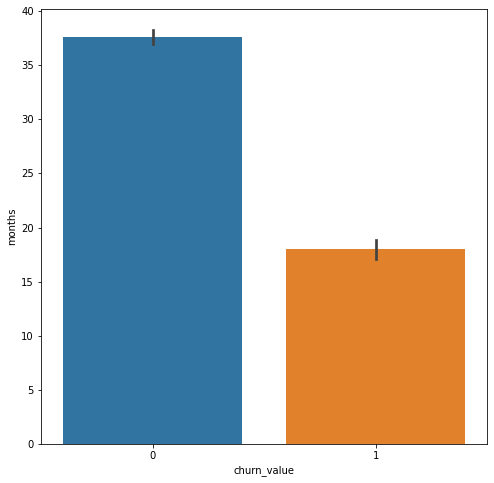

In [8]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='churn_value',y='months')

Text(0, 0.5, 'Survival probability')

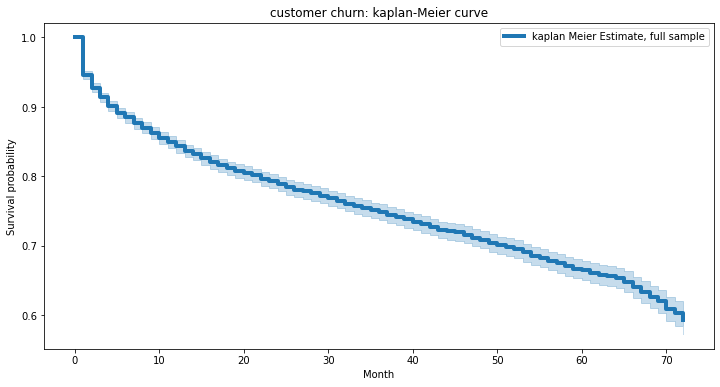

In [9]:
#plotting the kaplan-meier curve
kmf=KaplanMeierFitter()
kmf.fit(df.months,df.churn_value,label='kaplan Meier Estimate, full sample')
kmf.plot(linewidth=4,figsize=(12,6))
plt.title('customer churn: kaplan-Meier curve')
plt.xlabel('Month')
plt.ylabel('Survival probability')

churn_value
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: months, dtype: object

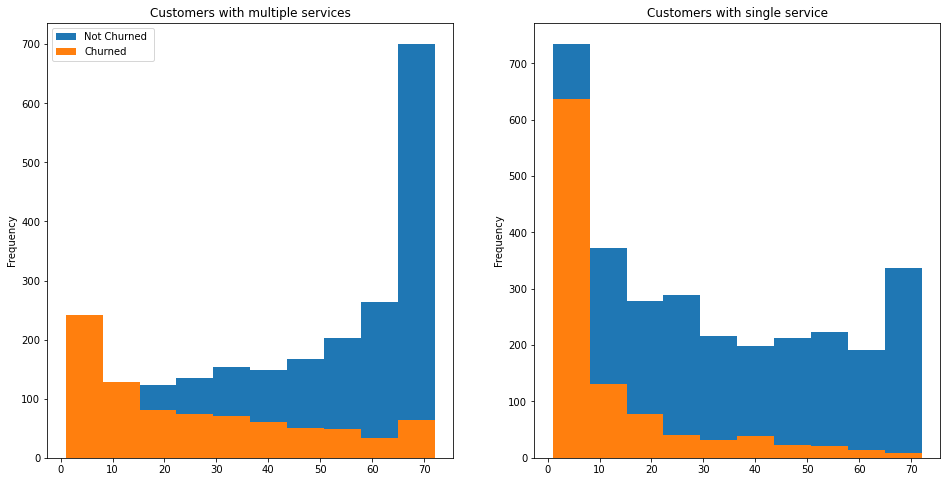

In [10]:
# examin the varibale
df1=df[df.multiple=='Yes']
df2=df[df.multiple=='No']
fig,ax=plt.subplots(1,2,figsize=(16,8))
df1.groupby('churn_value')['months'].plot(kind='hist',ax=ax[0],title='Customers with multiple services')
ax[0].legend(labels=['Not Churned ','Churned'])
df2.groupby('churn_value')['months'].plot(kind='hist',ax=ax[1],title='Customers with single service')

Text(0, 0.5, 'Survival Probabiltiy')

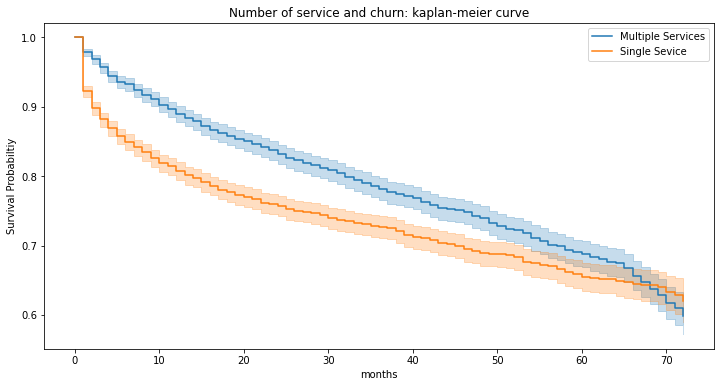

In [13]:
ax=plt.axes()
kmf.fit(df1.months,df1.churn_value,label='Multiple Services')
kmf.plot(figsize=(12,6),ax=ax)
kmf.fit(df2.months,df2.churn_value,label='Single Sevice')
kmf.plot(figsize=(12,6),ax=ax)
plt.title('Number of service and churn: kaplan-meier curve')
plt.xlabel('months')
plt.ylabel('Survival Probabiltiy')

In [14]:
#cox proportional hazard model
dfu=df[['multiple','churn_value']]
dfd=pd.get_dummies(dfu,drop_first=True)
dfd['months']=df.months
dfd.rename(columns={'multiple_yes':'Multiple Service'},inplace=True)

In [15]:
dfd

,churn_value,multiple_Yes,months
0,1,0,1
1,1,1,8
2,1,1,18
3,1,0,25
4,1,1,37
...,...,...,...
7038,0,0,72
7039,0,1,24
7040,0,1,72
7041,0,0,11


In [17]:
cph=CoxPHFitter()
cph.fit(dfd,duration_col='months',event_col='churn_value')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'churn_value'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15641.90
         time fit was run = 2022-05-24 07:09:03 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
multiple_Yes  -0.24       0.79       0.05            -0.33            -0.15                 0.72                 0.86

               cmp to     z      p   -log2(p)
covariate                                    
multiple_Yes     0.00 -5.06 <0.005      21.18
---
Concordance = 0.55
Partial AIC = 31285.81
log-likelihood ratio test = 25.72 on 1 df
-log2(p) of ll-ratio test = 21.27

<AxesSubplot:xlabel='log(HR) (95% CI)'>

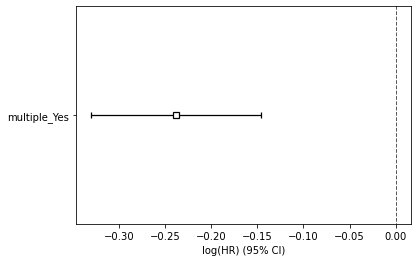

In [18]:
cph.plot()

<AxesSubplot:>

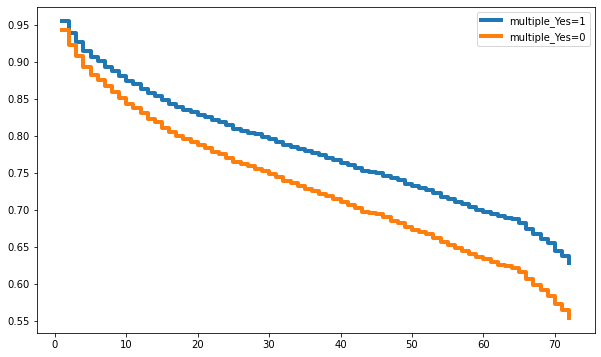

In [25]:
cph.plot_partial_effects_on_outcome('multiple_Yes',[1,0],plot_baseline=False,figsize=(10,6),lw=4)

In [26]:
dfu=df[['churn_value','satisfaction','security','backup','support']]
dfd=pd.get_dummies(dfu,drop_first=True)
dfd['months']=df.months
dfd.rename(columns={'backup_Yes':'Backup Service'},inplace=True)
dfd.rename(columns={'security_Yes':'Security Service'},inplace=True)
dfd.rename(columns={'support_Yes':'Support Service'},inplace=True)

In [27]:
dfd

,churn_value,satisfaction,Security Service,Backup Service,Support Service,months
0,1,3,0,0,0,1
1,1,3,0,1,0,8
2,1,2,0,0,0,18
3,1,2,0,1,0,25
4,1,2,0,0,0,37
...,...,...,...,...,...,...
7038,0,5,0,0,0,72
7039,0,3,1,0,1,24
7040,0,4,0,1,0,72
7041,0,4,1,0,0,11


In [29]:
cph=CoxPHFitter()
cph.fit(dfd,duration_col='months',event_col='churn_value')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'churn_value'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13308.14
         time fit was run = 2022-05-24 07:58:24 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
satisfaction      -1.30       0.27       0.02            -1.34            -1.25                 0.26                 0.29
Security Service  -1.09       0.34       0.07            -1.22            -0.96                 0.29                 0.38
Backup Service    -0.63       0.53       0.05            -0.73            -0.52                 0.48                 0.59
Support Service   -0.49       0.61       0.06            -0.61            -0.36                 0.54                 0.70

                   cmp to      z      p   -log2(p)
covariate                                         
satisfaction         0.00 -55.26 <0.005        inf
Security Service     0.00 -16.46 <0.005     199.73
Backup Service       0.00 -11.77 <0.005     103.89
Support Service      0.00  -7.50 <0.005      43.84
---
Concordance = 0.90
Partial AIC = 26624.27
log-likelihood ratio test = 4693.25 on 4 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

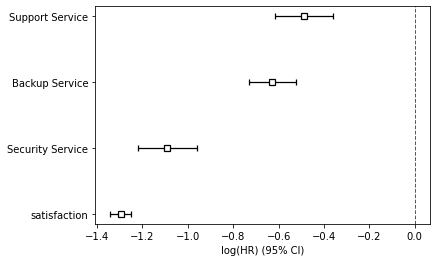

In [30]:
cph.plot()

<AxesSubplot:>

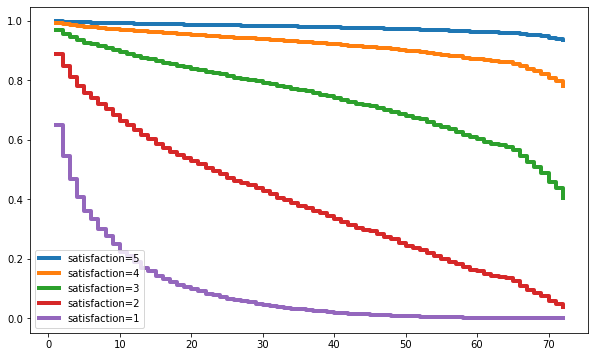

In [31]:
cph.plot_partial_effects_on_outcome('satisfaction',[5,4,3,2,1],plot_baseline=False,figsize=(10,6),lw=4)